## FEATURE ENGINEERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pep_data=pd.read_csv("PEP1.csv")

In [3]:
pep_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
pep_data.shape

(1460, 81)

In [5]:
dtypes=pd.DataFrame(pep_data.dtypes.value_counts().reset_index(name='col_types'))
dtypes

index  col_types
0   object         43
1    int64         35
2  float64          3

<AxesSubplot:>

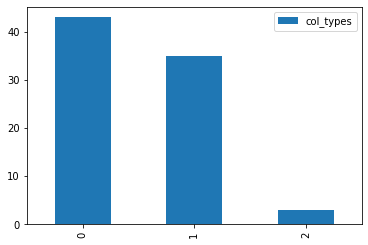

In [6]:
dtypes.plot(kind='bar')

In [7]:
for col in pep_data.columns:
    if pep_data[col].isna().sum()>0:
        print(f"{col} : {pep_data[col].isna().sum()} , {col}-null_perc : {pep_data[col].isna().sum()/pep_data.shape[0]}")
        

LotFrontage : 259 , LotFrontage-null_perc : 0.1773972602739726
Alley : 1369 , Alley-null_perc : 0.9376712328767123
MasVnrType : 8 , MasVnrType-null_perc : 0.005479452054794521
MasVnrArea : 8 , MasVnrArea-null_perc : 0.005479452054794521
BsmtQual : 37 , BsmtQual-null_perc : 0.025342465753424658
BsmtCond : 37 , BsmtCond-null_perc : 0.025342465753424658
BsmtExposure : 38 , BsmtExposure-null_perc : 0.026027397260273973
BsmtFinType1 : 37 , BsmtFinType1-null_perc : 0.025342465753424658
BsmtFinType2 : 38 , BsmtFinType2-null_perc : 0.026027397260273973
Electrical : 1 , Electrical-null_perc : 0.0006849315068493151
FireplaceQu : 690 , FireplaceQu-null_perc : 0.4726027397260274
GarageType : 81 , GarageType-null_perc : 0.05547945205479452
GarageYrBlt : 81 , GarageYrBlt-null_perc : 0.05547945205479452
GarageFinish : 81 , GarageFinish-null_perc : 0.05547945205479452
GarageQual : 81 , GarageQual-null_perc : 0.05547945205479452
GarageCond : 81 , GarageCond-null_perc : 0.05547945205479452
PoolQC : 1453

In [8]:
pep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
pep_data.shape

(1460, 81)

In [ ]:
for col in pep_data.columns:
    print("{} : {}".format(col, pep_data[col].unique()))

In [ ]:
pep_data[~(pep_data["PoolQC"].isna())]

In [10]:
num_cols=[]
cat_cols=[]
for col in pep_data.columns:
    if pep_data[col].dtype == 'int64' or pep_data[col].dtype == 'float64':
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [ ]:
print(num_cols, cat_cols)
print(len(num_cols), len(cat_cols))

In [11]:
num_cols_data=pep_data[num_cols]
num_cols_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [12]:
cat_cols_data=pep_data[cat_cols]
cat_cols_data.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [ ]:
num_cols_data.isna().sum()

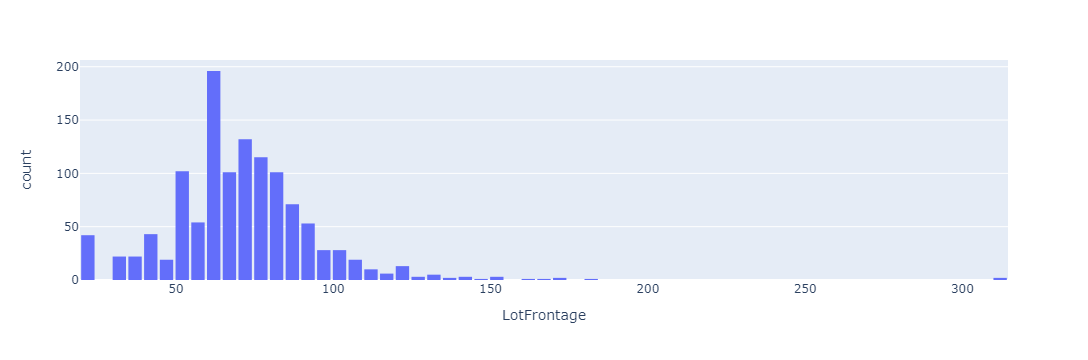

In [13]:
miss=["LotFrontage", "GarageYrBlt"]
import plotly.express as px
fig=px.histogram(num_cols_data, x=miss[0]) # , color='YrSold'
fig.update_layout(bargap=0.15)
fig.show()

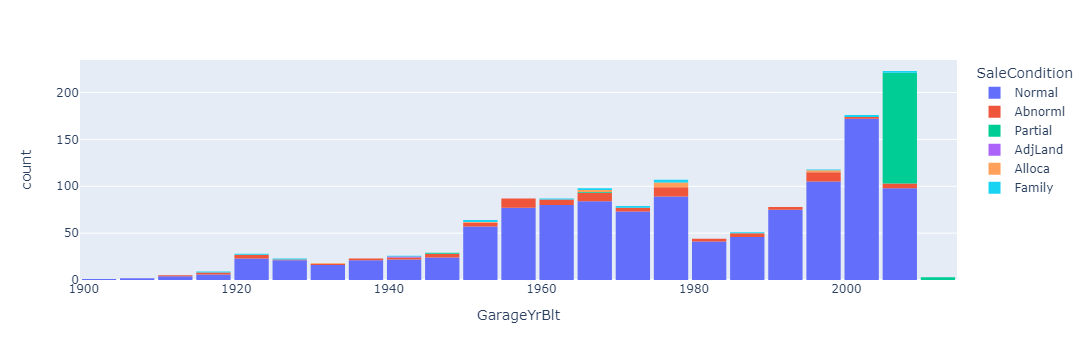

In [14]:
fig=px.histogram(pep_data, x=miss[1], color='SaleCondition')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
num_cols_data[miss].describe()

LotFrontage  GarageYrBlt
count  1201.000000  1379.000000
mean     70.049958  1978.506164
std      24.284752    24.689725
min      21.000000  1900.000000
25%      59.000000  1961.000000
50%      69.000000  1980.000000
75%      80.000000  2002.000000
max     313.000000  2010.000000

In [16]:
num_cols_data['GarageYrBlt'].fillna(num_cols_data['GarageYrBlt'].median(), inplace=True)

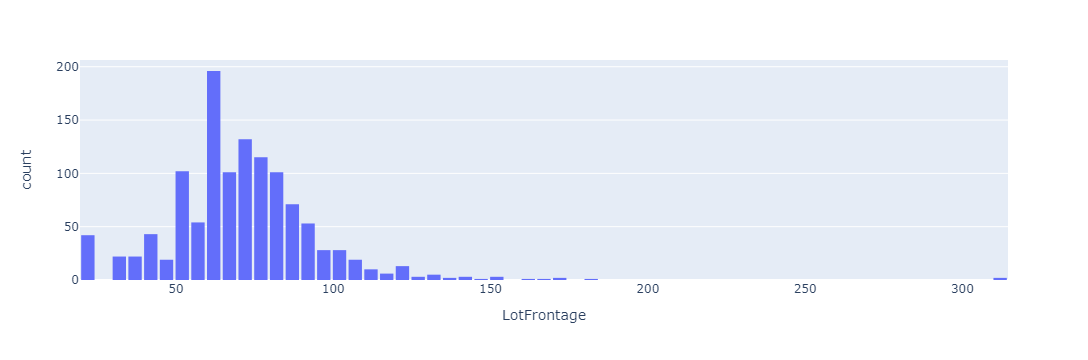

In [17]:
fig=px.histogram(num_cols_data, x=miss[0])
fig.update_layout(bargap=0.15)
fig.show()

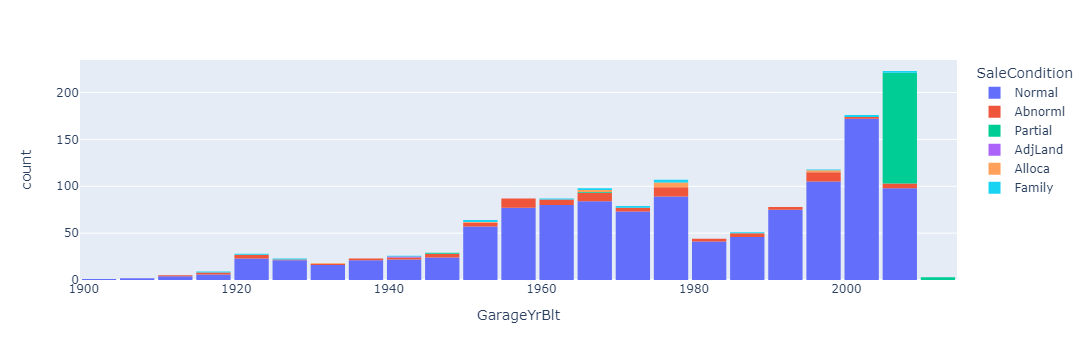

In [18]:
fig=px.histogram(pep_data, x=miss[1], color='SaleCondition')
fig.update_layout(bargap=0.1)
fig.show()

<AxesSubplot:>

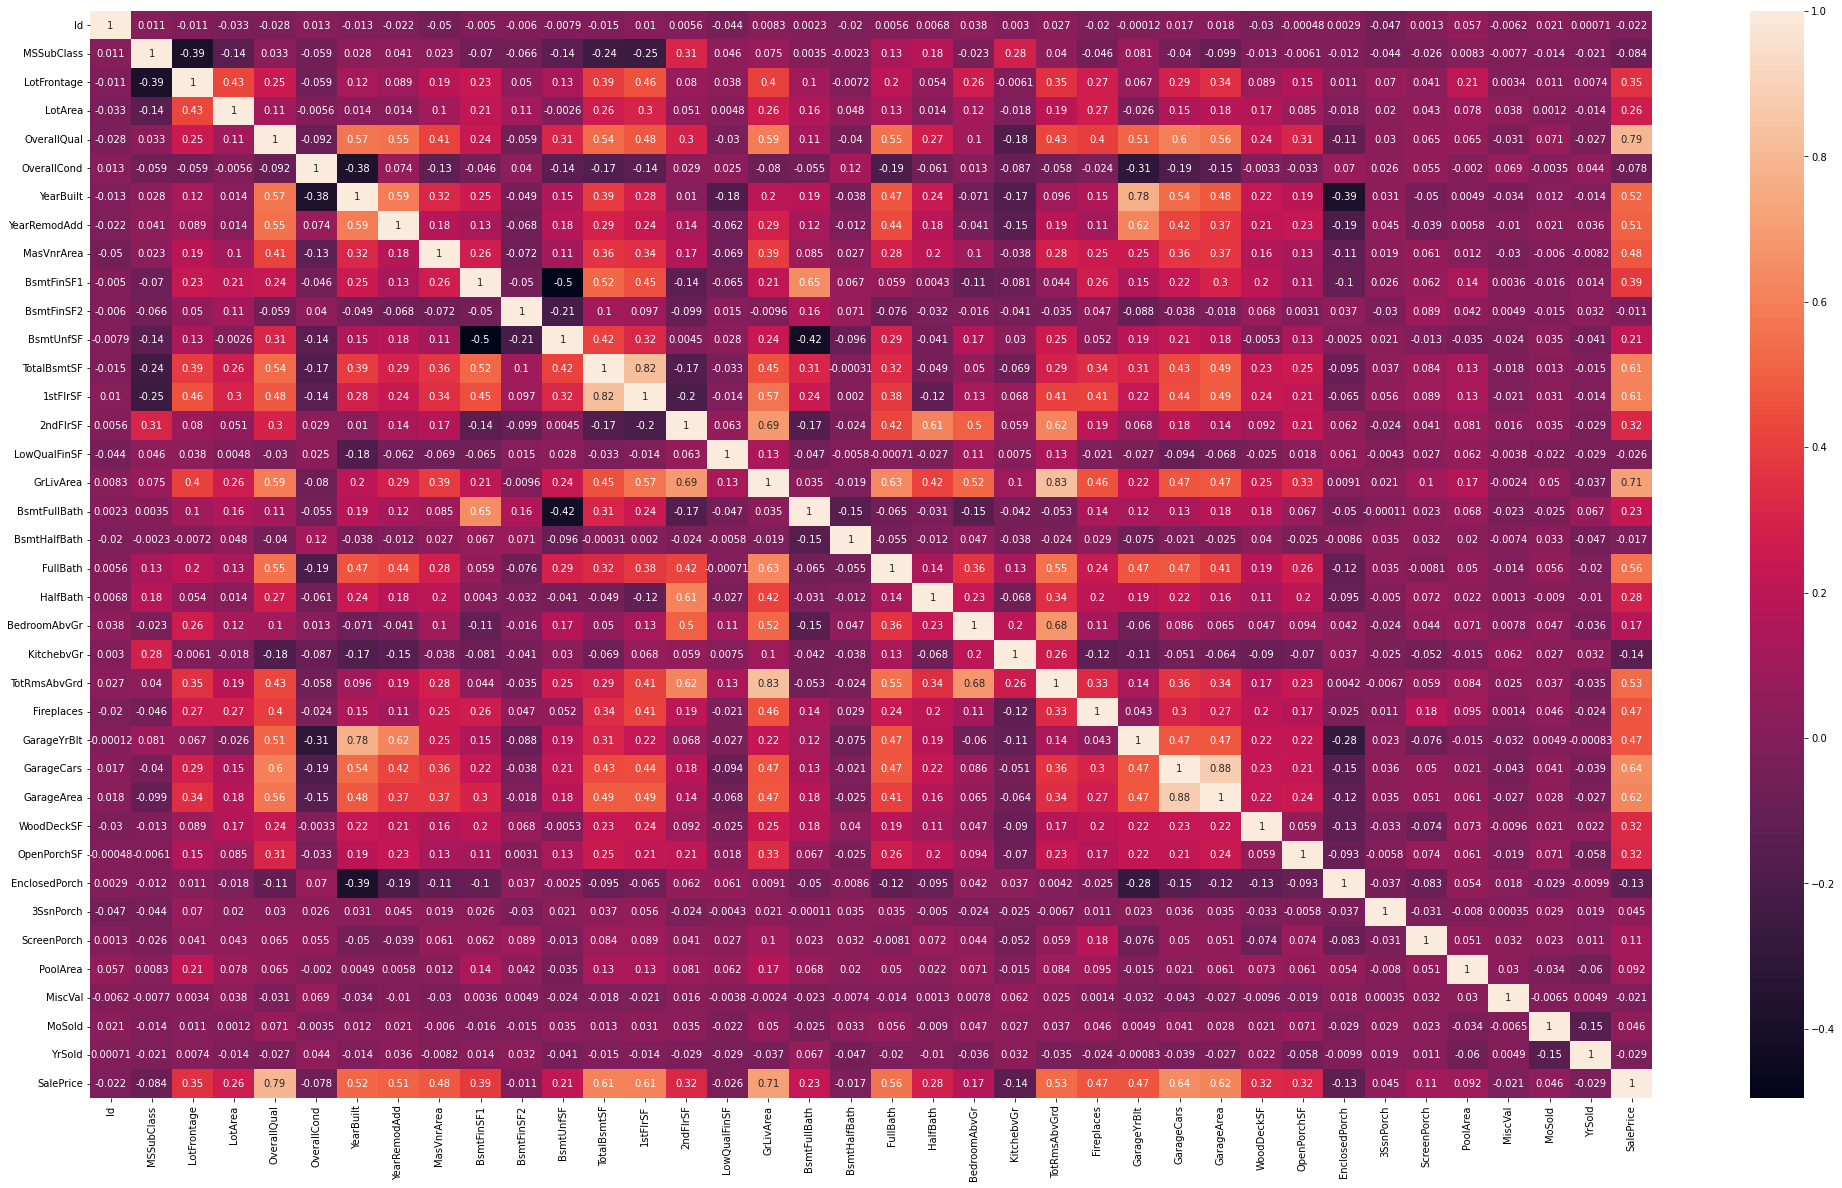

In [19]:
corr=num_cols_data.corr()
plt.figure(figsize=(35,20))
sns.heatmap(corr, annot=True)

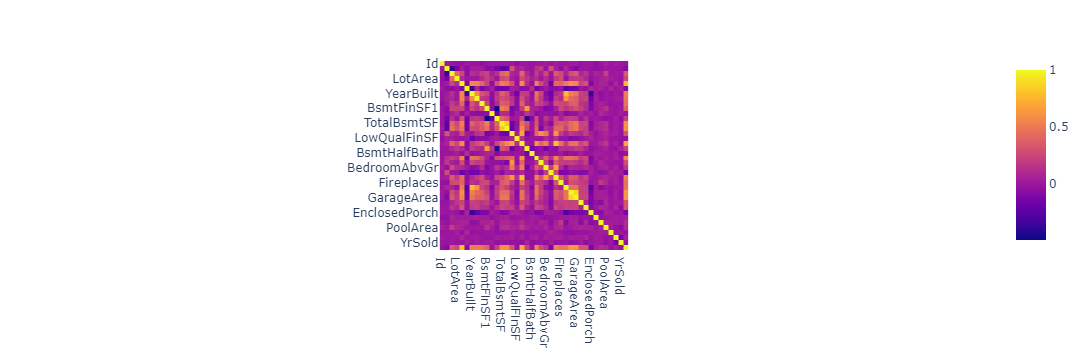

<Figure size 2520x1440 with 0 Axes>

In [24]:
plt.figure(figsize=(35,20))
fig=px.imshow(corr, text_auto=True)
fig.show()

In [22]:
significant_features=['OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'Fireplaces',
       'GarageCars', 'SalePrice']

<Figure size 1080x504 with 0 Axes>

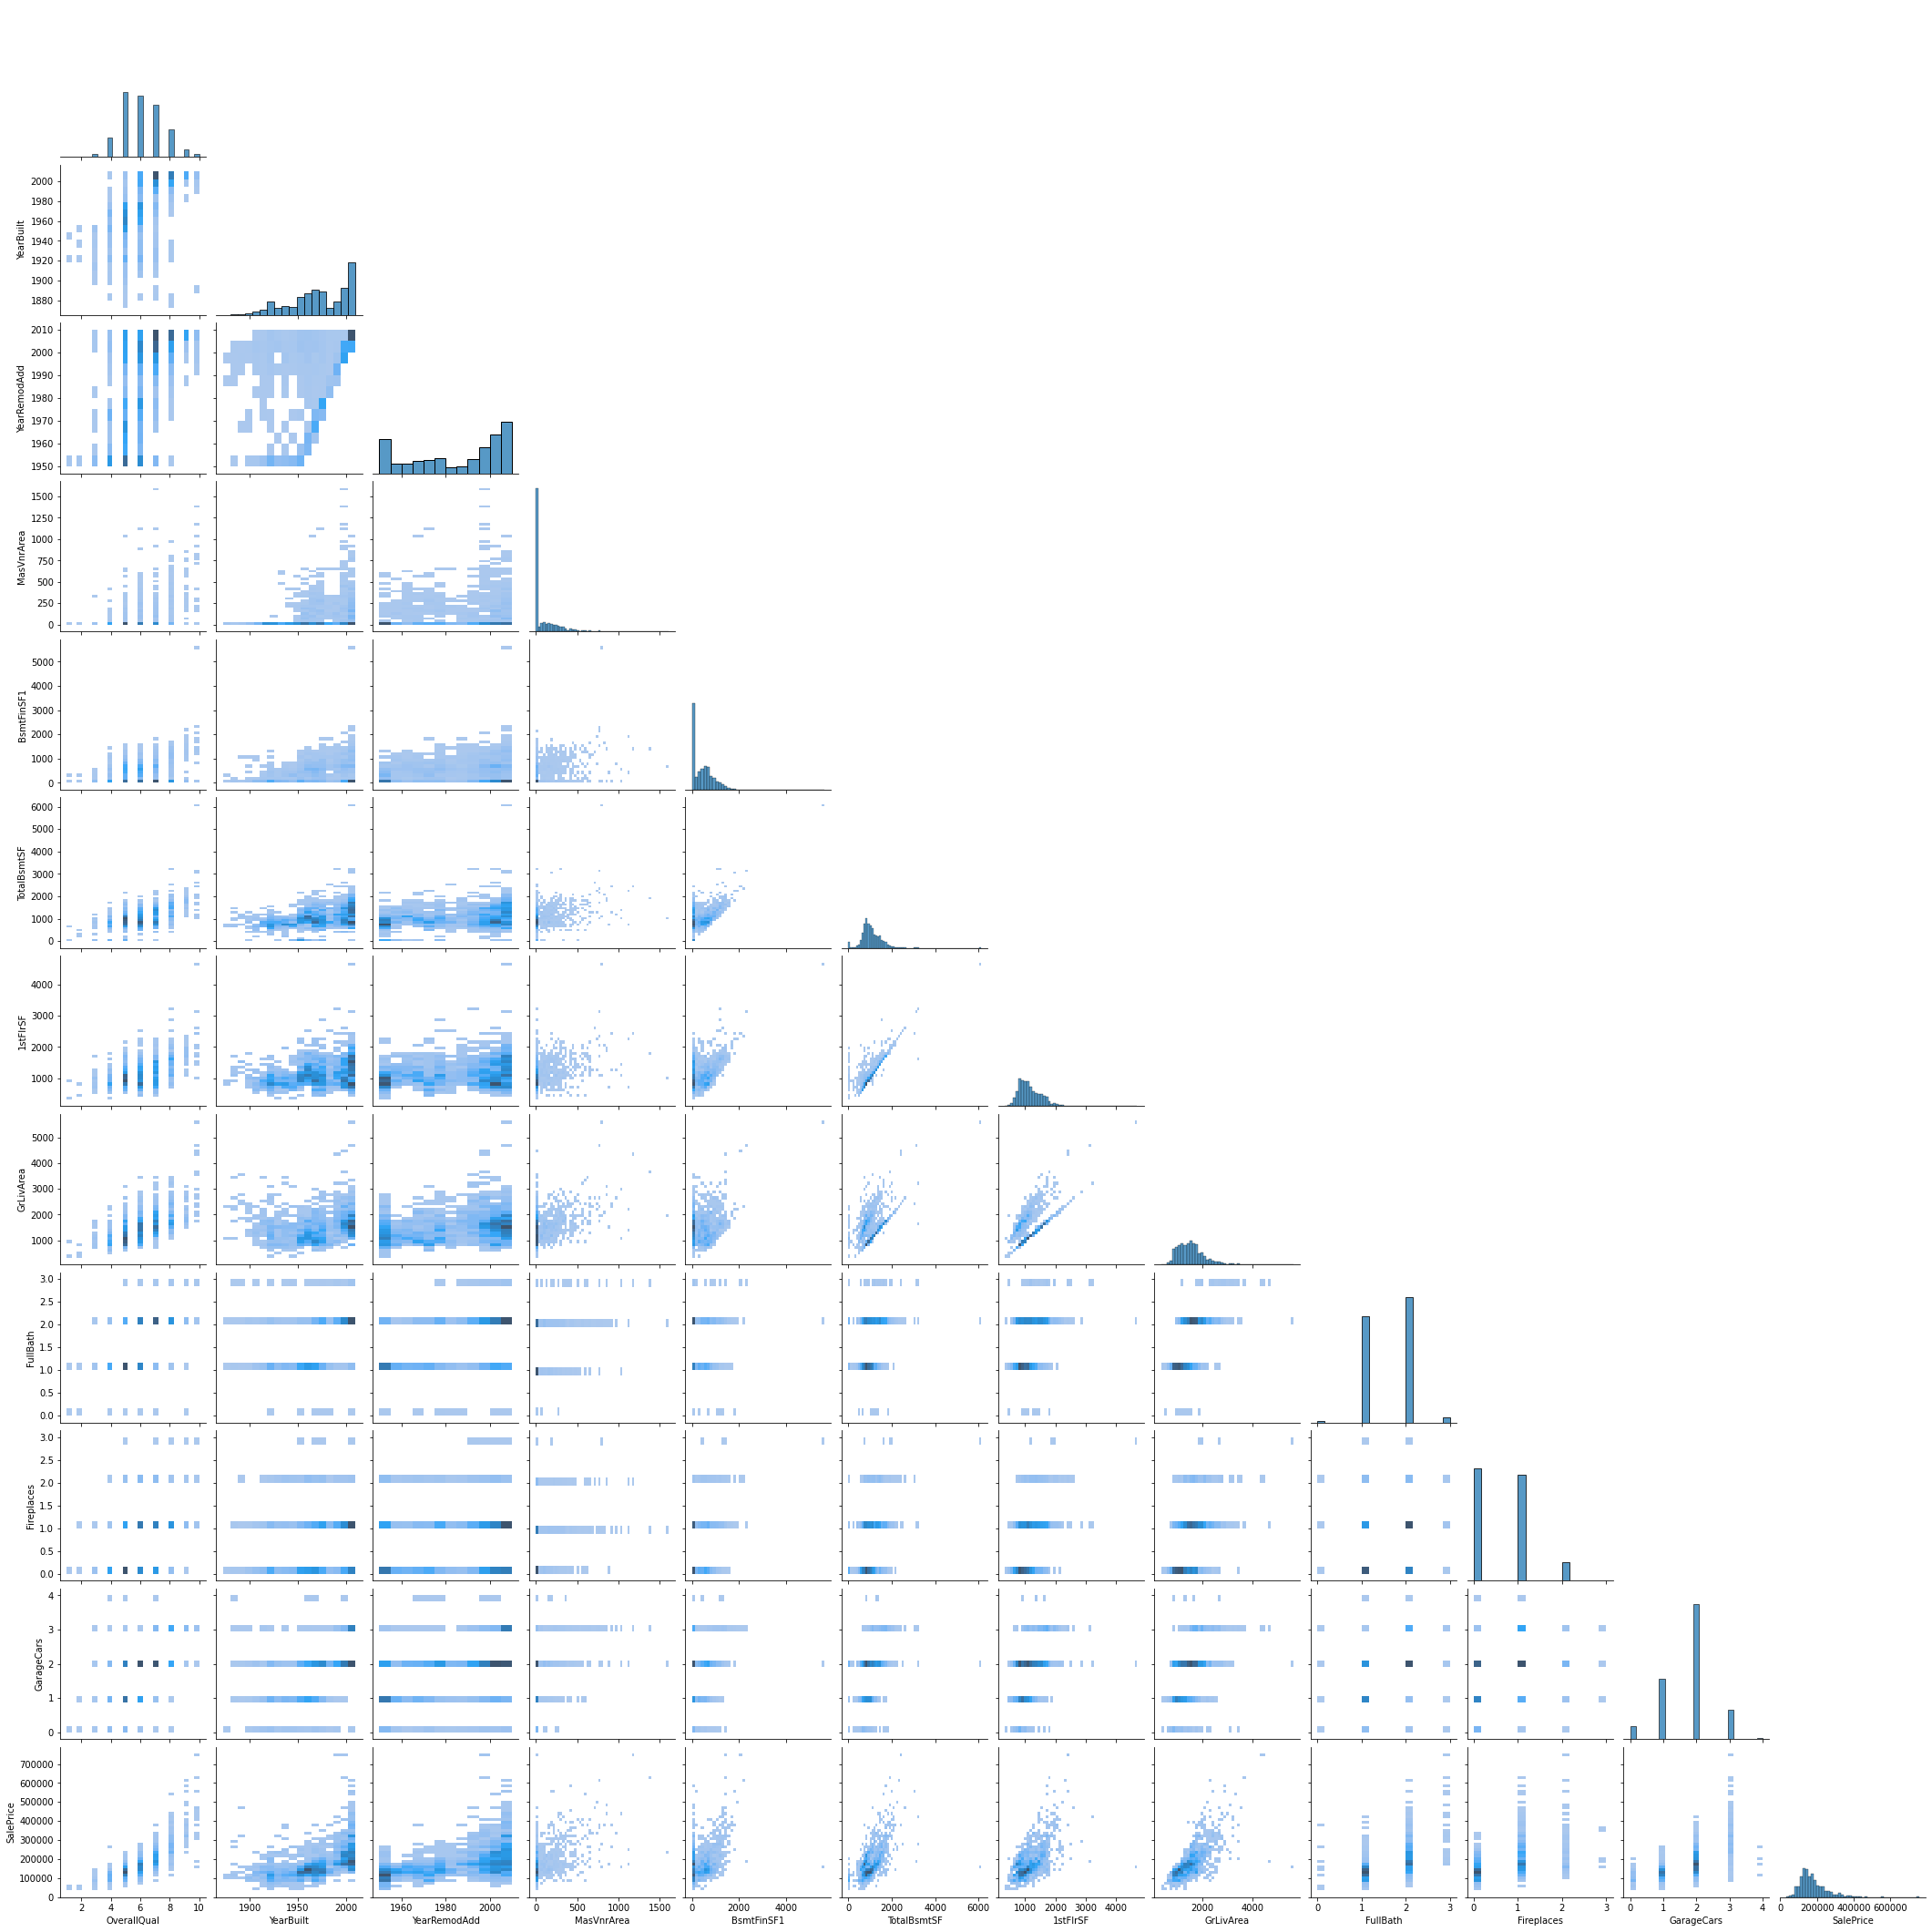

In [23]:
plt.figure(figsize=(15,7))
sns.pairplot(num_cols_data[significant_features], kind='hist', diag_kind='hist', corner=True)

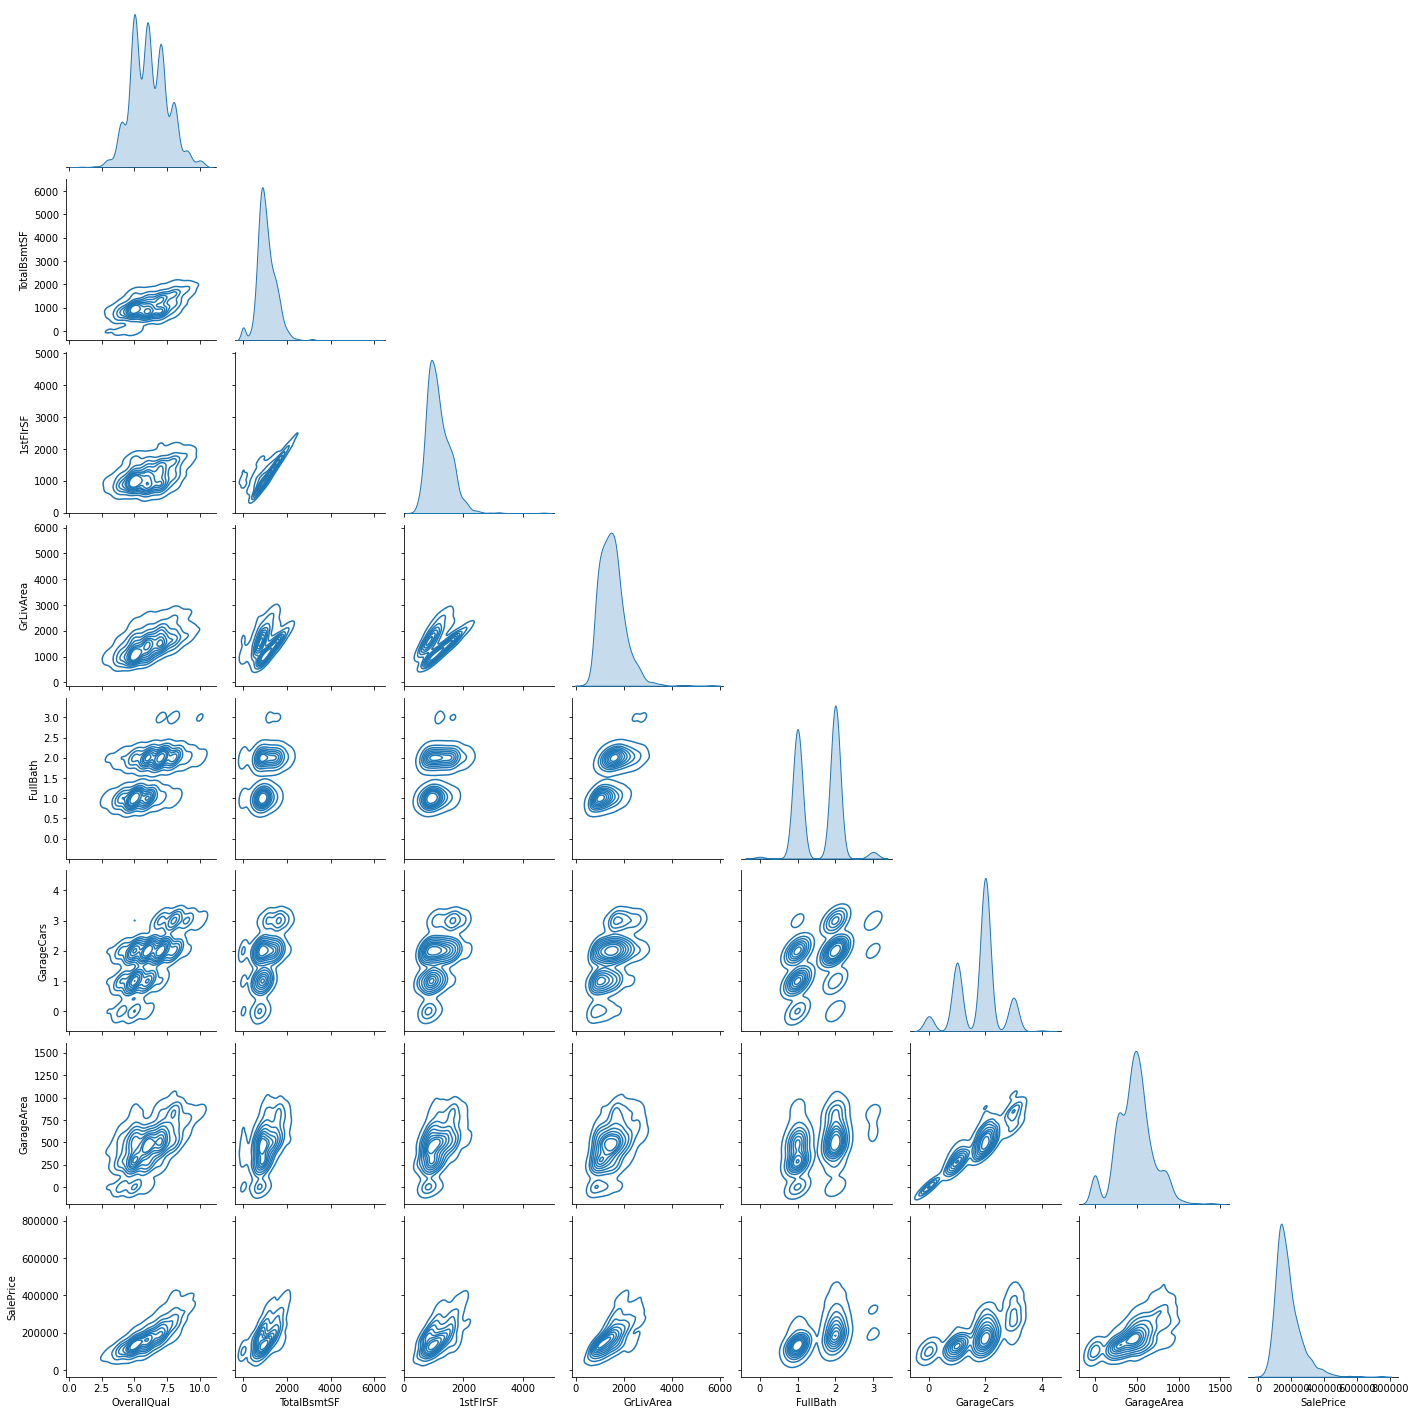

In [27]:
sns.pairplot(num_cols_data[significant_features], kind='kde', diag_kind='kde', corner=True)

In [25]:
cat_cols_data.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [24]:
miss1=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond']
moremiss=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
for col in miss1:
    print("{}".format(cat_cols_data[col].value_counts(normalize=True, dropna=False))) # , dropna=False

In [26]:
for col in miss1:
    print("mean of missing value perc of {} is : {:.2f}".format(col, cat_cols_data[col].isnull().mean()))

mean of missing value perc of MasVnrType is : 0.01
mean of missing value perc of BsmtQual is : 0.03
mean of missing value perc of BsmtCond is : 0.03
mean of missing value perc of BsmtExposure is : 0.03
mean of missing value perc of BsmtFinType1 is : 0.03
mean of missing value perc of BsmtFinType2 is : 0.03
mean of missing value perc of Electrical is : 0.00
mean of missing value perc of GarageType is : 0.06
mean of missing value perc of GarageFinish is : 0.06
mean of missing value perc of GarageQual is : 0.06
mean of missing value perc of GarageCond is : 0.06


In [ ]:
## create copy of original variable to new one
for i, j in zip(miss1, imputed):
    cat_cols_data[j]=cat_cols_data[i].copy()

In [ ]:
random_sample = cat_cols_data['GarageQual'].dropna().sample(cat_cols_data['GarageQual'].isnull().sum(), random_state=43)
random_sample

In [ ]:
random_sample = cat_cols_data['GarageQual'].dropna().sample(cat_cols_data['GarageQual'].isnull().sum(), random_state=43)
random_sample

In [74]:
random_sample.index=cat_cols_data[cat_cols_data['GarageQual'].isnull()].index

In [ ]:
cat_cols_data.loc[cat_cols_data['GarageQual'].isnull(), 'new_GarageQual']=random_sample

In [ ]:
cat_cols_data['new_GarageQual']

In [ ]:
cat_cols_data['new_GarageQual'].value_counts()

In [ ]:
# In above piece of code we had done that we created sample which is random values in Alley variable which of lenght equal to missing values in Alley.

In [ ]:
'''for col in cat_cols_data.columns:
    if col in moremiss:
        random_sample_train=x_train[col].dropna().sample(x_train[col].isnull().sum(), random_state=0, replace=True)
        random_sample_test=x_train[col].dropna().sample(x_test[col].isnull().sum(), random_state=0, replace=True)
    else:
        random_sample_train=x_train[col].dropna().sample(x_train[col].isnull().sum(), random_state=0)
        random_sample_test=x_train[col].dropna().sample(x_test[col].isnull().sum(), random_state=0)'''

## Splitting dataset to impute missing value treatment

In [27]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(cat_cols_data, pep_data['SalePrice'], test_size=0.25, random_state=43)

In [31]:
## create copy of original variable to new one
for i, j in zip(miss1, imputed):
    x_train[j]=x_train[i].copy()
    x_test[j]=x_test[i].copy()

In [32]:
def random_sample_new(col):
    random_sample_train=x_train[col].dropna().sample(x_train[col].isnull().sum(), random_state=0)
    random_sample_test=x_train[col].dropna().sample(x_test[col].isnull().sum(), random_state=0)
    random_sample_train.index=x_train[x_train[col].isnull()].index
    random_sample_test.index=x_test[x_test[col].isnull()].index
    x_train.loc[x_train[col].isnull(), d[col]]=random_sample_train
    x_test.loc[x_test[col].isnull(), d[col]]=random_sample_test

In [33]:
# In above piece of code we had done that we created sample which is random values in selected variable which of length equal to missing values in selected variable.

In [29]:
imputed=[]

In [30]:
for i in miss1:
    i='new_' + i
    imputed.append(i)


In [34]:
imputed

['new_MasVnrType',
 'new_BsmtQual',
 'new_BsmtCond',
 'new_BsmtExposure',
 'new_BsmtFinType1',
 'new_BsmtFinType2',
 'new_Electrical',
 'new_GarageType',
 'new_GarageFinish',
 'new_GarageQual',
 'new_GarageCond']

In [35]:
d=dict()
for i, j in zip(miss1, imputed):
    d[i]=j

In [36]:
for col in miss1:
    random_sample_new(col)

In [37]:
x_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'new_MasVnrType', 'new_BsmtQual',
       'new_BsmtCond', 'new_BsmtExposure', 'new_BsmtFinType1',
       'new_BsmtFinType2', 'new_Electrical', 'new_GarageType',
       'new_GarageFinish', 'new_GarageQual', 'new_GarageCond'],
      dtype='object')

In [38]:
x_train.drop(moremiss, axis=1, inplace=True)
x_test.drop(moremiss, axis=1, inplace=True)

In [39]:
x_train.drop(miss1, axis=1, inplace=True)
x_test.drop(miss1, axis=1, inplace=True)

In [ ]:
for col in x_train.columns:
    print("{}".format(x_train[col].value_counts(normalize=False, dropna=False))) # , dropna=False

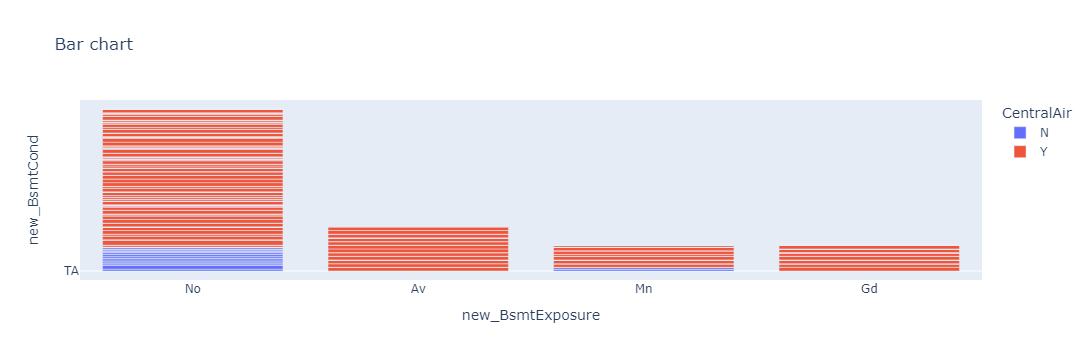

In [40]:
fig=px.bar(x_train, x='new_BsmtExposure', y='new_BsmtCond', color='CentralAir', title='Bar chart')
fig.show()

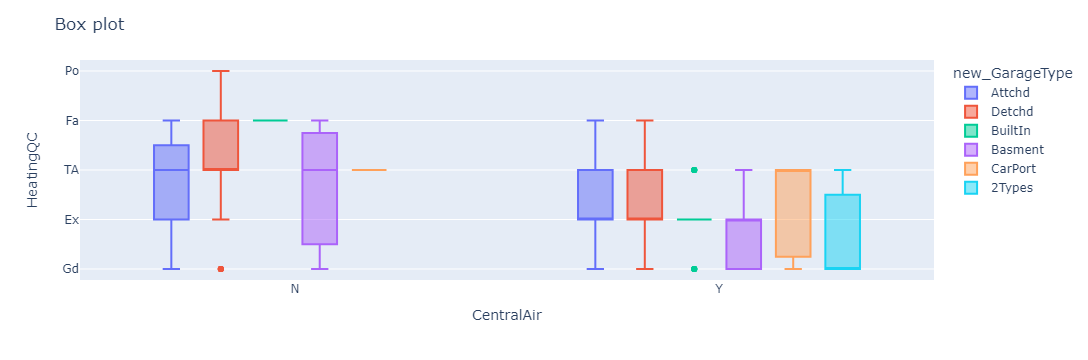

In [41]:
fig=px.box(x_train, y='HeatingQC', x='CentralAir', color='new_GarageType')
fig.update_layout(title='Box plot')
fig.show()

In [42]:
#new_cat_col_data=pd.concat([x_train, x_test])
#new_cat_col_data.shape

In [43]:
#new_cat_col_data=pd.concat([new_cat_col_data, pep_data['SalePrice']], axis=1)
#new_cat_col_data.shape

In [44]:
#new_cat_col_data.drop('SalePrice', axis=1, inplace=True)

In [46]:
#new_cat_col_data.drop(miss1, axis=1, inplace=True)

In [ ]:
x_train[x_train.isna().any(axis=1)]

In [ ]:
x_train.isna().sum()

## MODEL BUILDING

In [49]:
num_cols_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [50]:
selected_cols=['LotFrontage', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath','TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']

<AxesSubplot:>

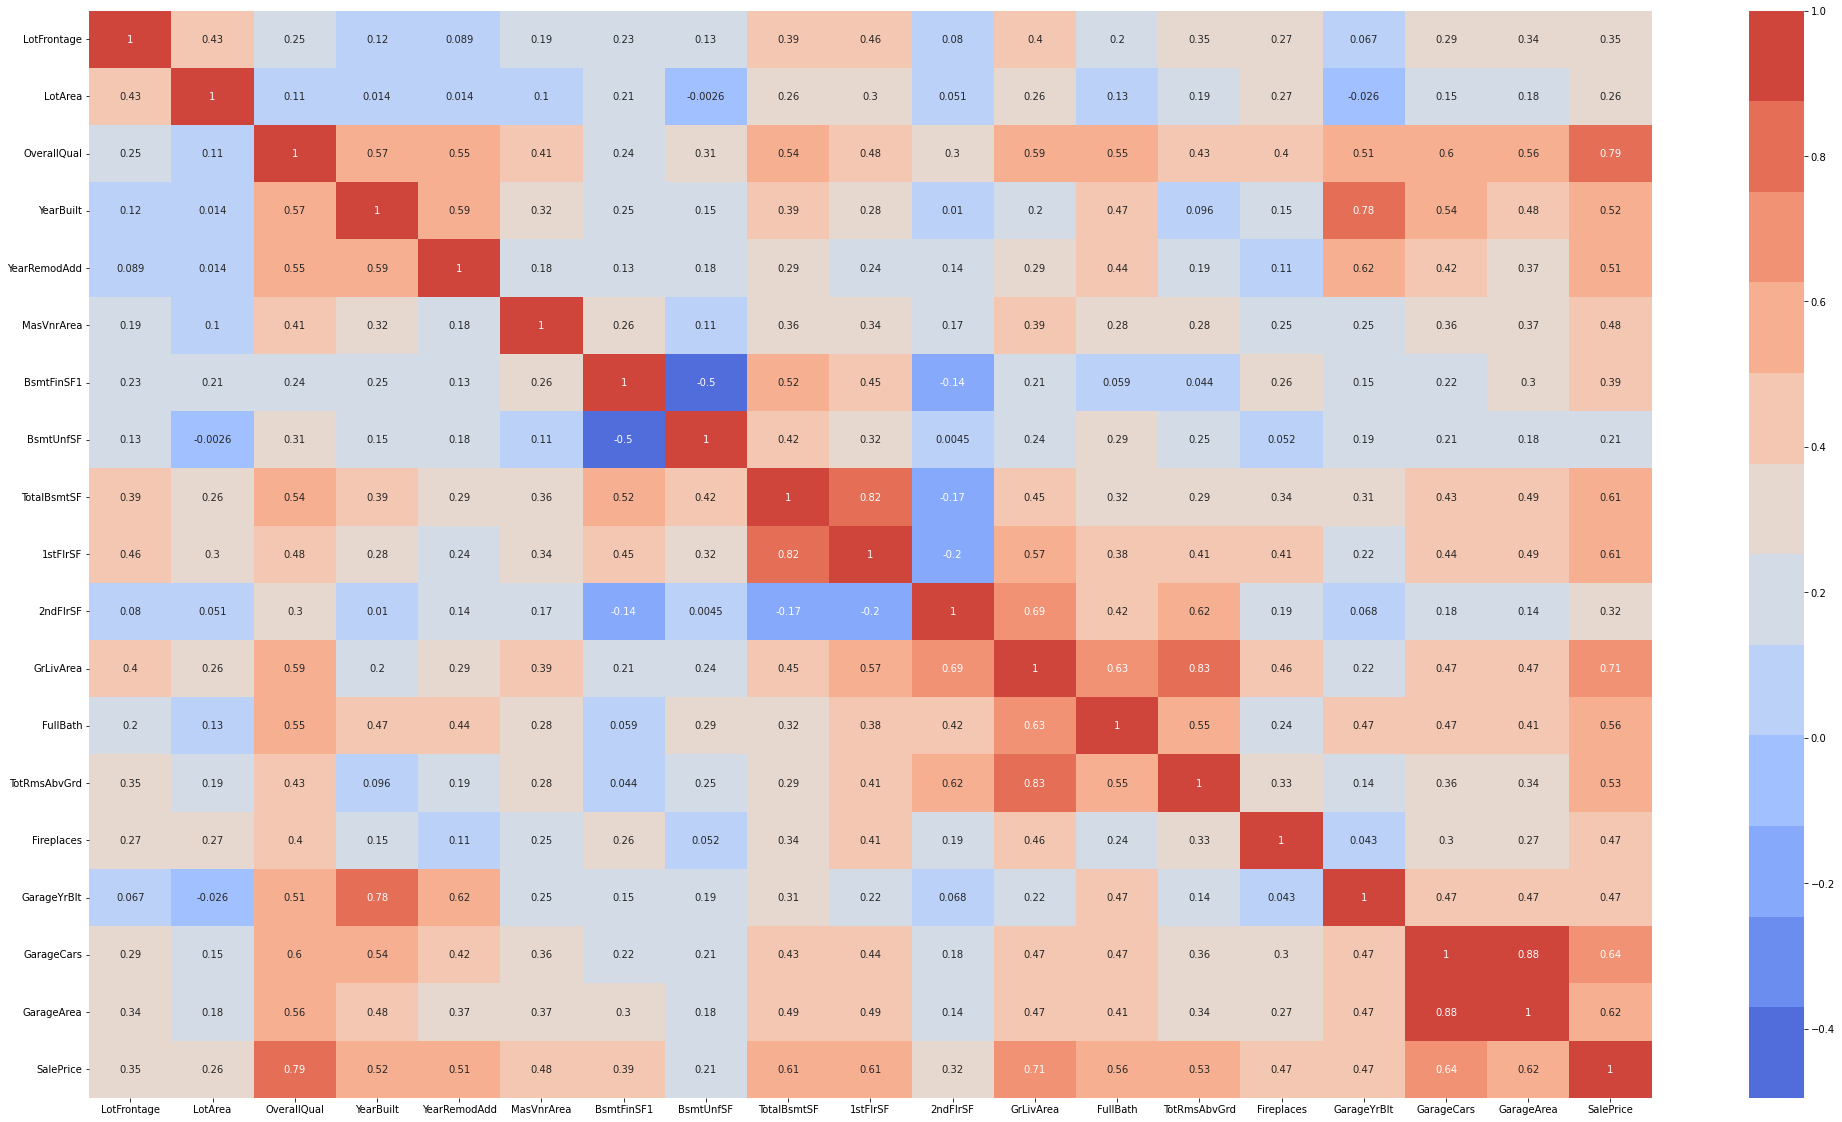

In [51]:
corr=num_cols_data[selected_cols].corr()
plt.figure(figsize=(35,20))
sns.heatmap(corr, annot=True, cmap=sns.color_palette("coolwarm", 12))

## Removed multicollinearity from above heatmap remaining variables 

In [52]:
new_selected_cols=['OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'Fireplaces',
       'GarageCars', 'SalePrice']

In [53]:
from scipy.stats import chi2_contingency

## Checking Relation exists between Categorical variables using chi square analysis

In [ ]:
c=0
for col1 in x_train.columns:
    for col2 in x_train.columns:
        if col1!=col2:
            contingency_table = pd.crosstab(x_train[col1], x_train[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            if p<0.05:
                c+=1
                print(f" {c} Chi-squared statistic for {col1, col2}: {chi2} p-value is {p}")
            

In [56]:
new_num_data=num_cols_data[new_selected_cols]

<Figure size 1440x720 with 0 Axes>

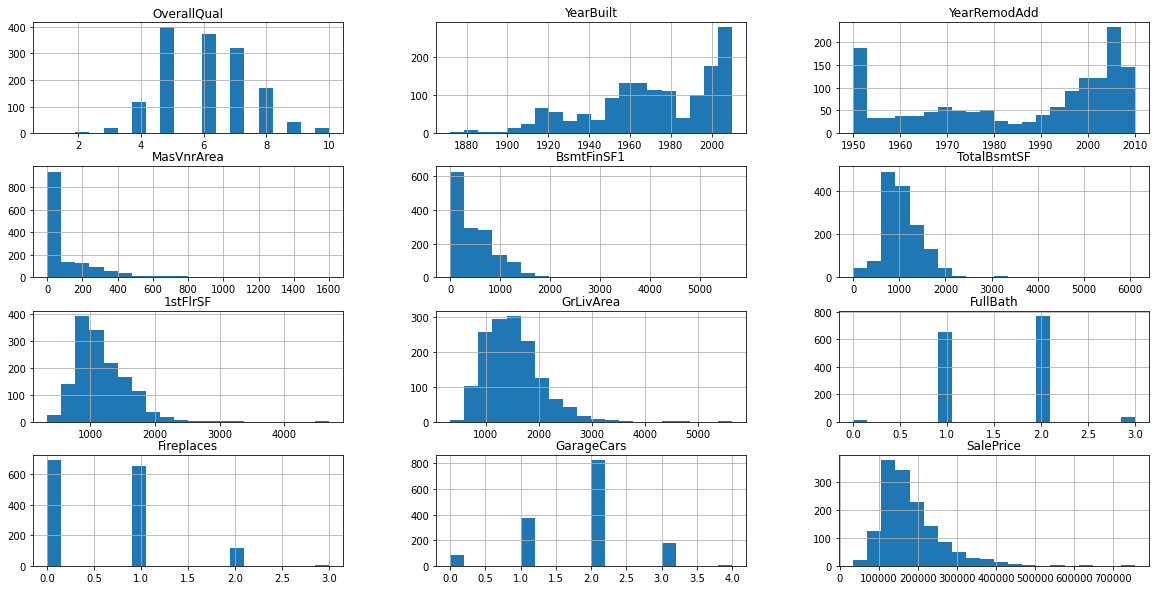

In [58]:
plt.figure(figsize=(20,10))
new_num_data.hist(bins=20, figsize=(20,10))
plt.show()

In [59]:
new_num_data["MasVnrArea"].fillna(new_num_data["MasVnrArea"].mode()[0], inplace=True)

In [60]:
X=new_num_data.drop('SalePrice', axis=1)
Y=new_num_data['SalePrice']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [66]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.25, random_state=43)
lr=LinearRegression()

In [67]:
def model_res(mod):
    mod.fit(x_train, y_train)
    y_pred=mod.predict(x_test)
    rsquare=r2_score(y_test,y_pred)
    mse=mean_squared_error(y_test, y_pred)
    mae=mean_absolute_error(y_test, y_pred)
    print('Model', mod) 
    print('R-2', rsquare)
    print('MSE', mse)
    print('MAE', mae)

In [68]:
model_res(lr)

Model LinearRegression()
R-2 0.8074675718780645
MSE 1270444006.2814314
MAE 22945.611469390115


In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dtr=DecisionTreeRegressor()
lasso=Lasso()
ridge=Ridge()

In [71]:
model_res(dtr)

Model DecisionTreeRegressor()
R-2 0.6919156662625392
MSE 2032924526.2417808
MAE 29605.606849315067


In [72]:
model_res(lasso)

Model Lasso()
R-2 0.8074685895545486
MSE 1270437291.0438886
MAE 22945.20766545359


In [73]:
model_res(ridge)

Model Ridge()
R-2 0.8074953307860377
MSE 1270260836.4196086
MAE 22938.73651512525


## Our model will predict with 80% variability 